In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
path = '../data/Crop_recommendation.csv'
df = pd.read_csv(path)

df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### There are no null values

In [4]:
df[df.duplicated()]

,N,P,K,temperature,humidity,ph,rainfall,label


### No duplicate items

In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


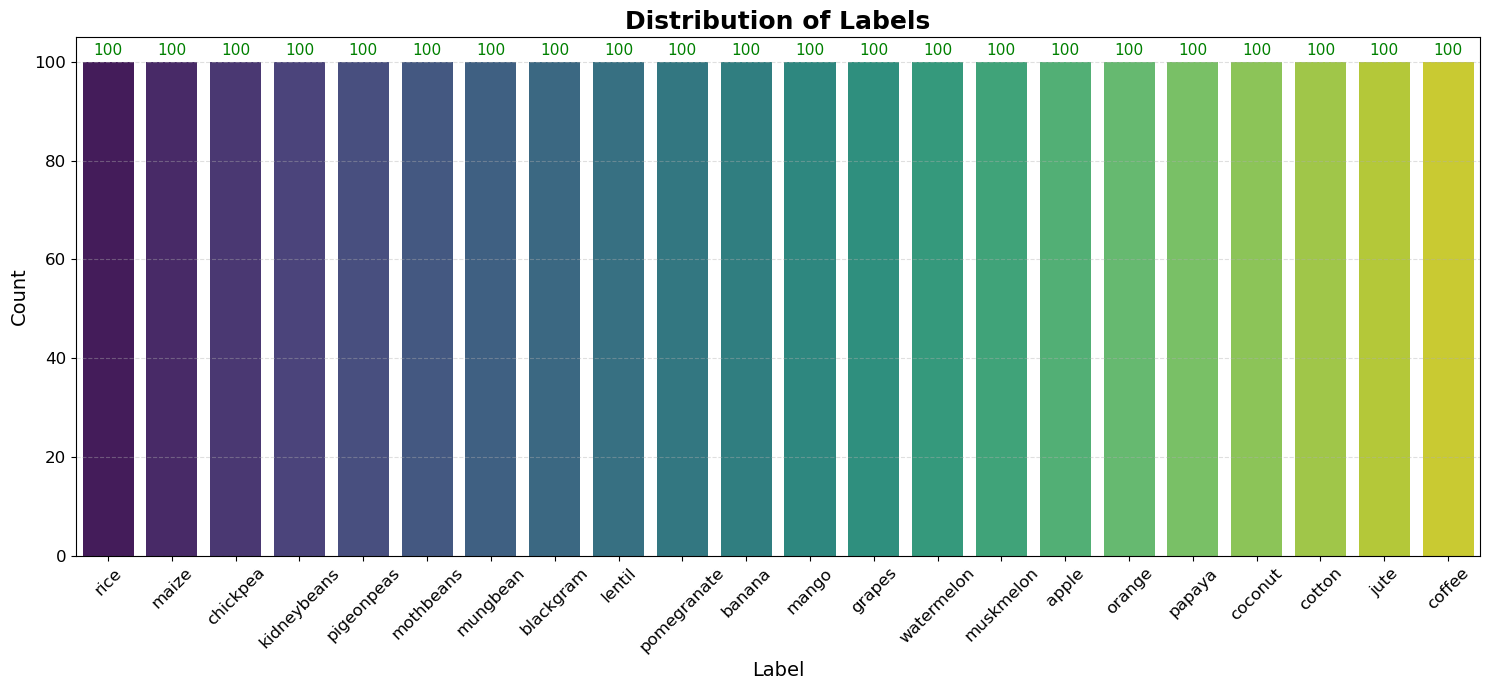

In [6]:
plt.figure(figsize=(15, 7))


ax = sns.countplot(
    data=df,
    x='label',
    hue='label',          
    palette='viridis',
    dodge=False,
    legend=False
)

# Titles and labels
plt.title('Distribution of Labels', fontsize=18, fontweight='bold')
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Ticks styling
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add horizontal gridlines
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%d',
        label_type='edge',
        padding=3,
        fontsize=11,
        color='green'
    )

plt.tight_layout()
plt.show()

In [7]:
len(df['label'].unique())

22

In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
X = df.drop(columns='label')
y = df['label']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scale = StandardScaler()

In [14]:
num_cols = [ col for col in X_train.columns if df[col].dtype != 'O' ]

In [15]:
correlation = df[num_cols].corr()

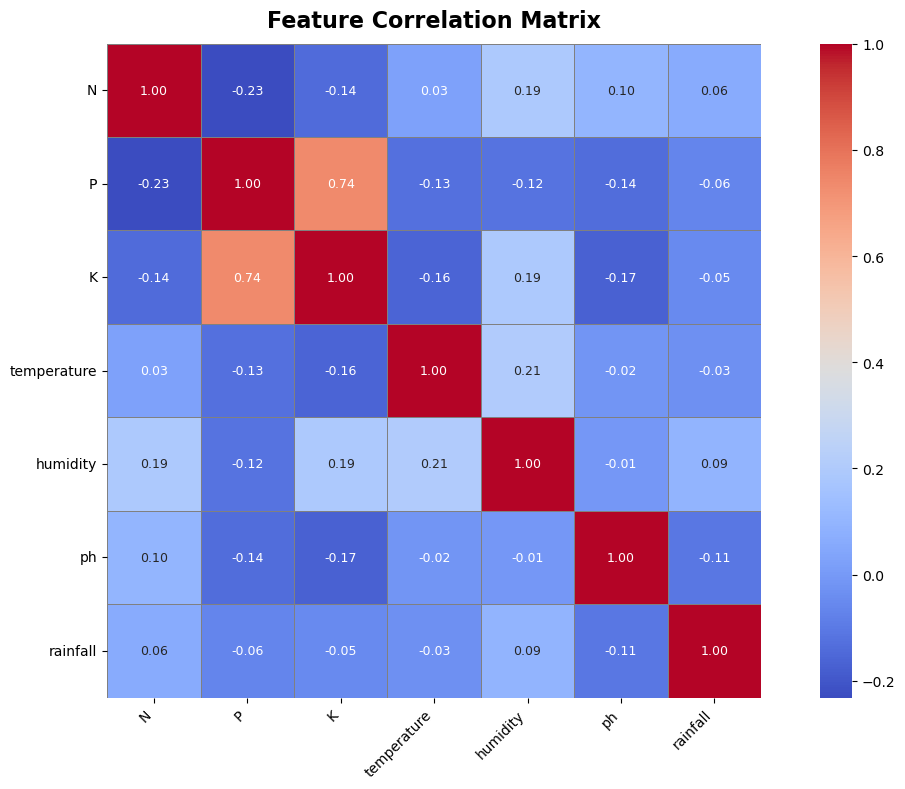

In [16]:
plt.figure(figsize=(12, 8))

ax = sns.heatmap(
    correlation,
    annot=True,          # display correlation values
    fmt=".2f",           # format to 2 decimal places
    linewidths=0.5,      # lines between cells
    linecolor="gray",
    cmap="coolwarm",     # diverging colormap
    cbar=True,           # show color bar
    square=True,         # make cells square
    annot_kws={"size": 9}
)

plt.title("Feature Correlation Matrix", fontsize=16, fontweight="bold", pad=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()

In [17]:
from sklearn.compose import ColumnTransformer

In [18]:
ct = ColumnTransformer(
    transformers=[ ("scale" , scale , num_cols) ]
)

In [19]:
X_train_transformed = ct.fit_transform( X_train )
X_test_transformed = ct.transform( X_test )

### Import models

In [20]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [21]:
models = {
    "svc" : SVC(),
    "logistic regression":LogisticRegression(),
    "knn":KNeighborsClassifier()
}

In [22]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [23]:
accuracy = {}

In [24]:
for name, model in models.items():
    print(f"Evaluating the model {name}")
    
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    
    acc = accuracy_score(y_test, y_pred)      # use y_test here
    print(f"Accuracy score of {name} is {acc:.4f}")
    
    accuracy[name] = acc
    
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))   # use y_test here
    print("-" * 94)

Evaluating the model svc
Accuracy score of svc is 0.9738
Confusion matrix:
[[38  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 41  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 31  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0

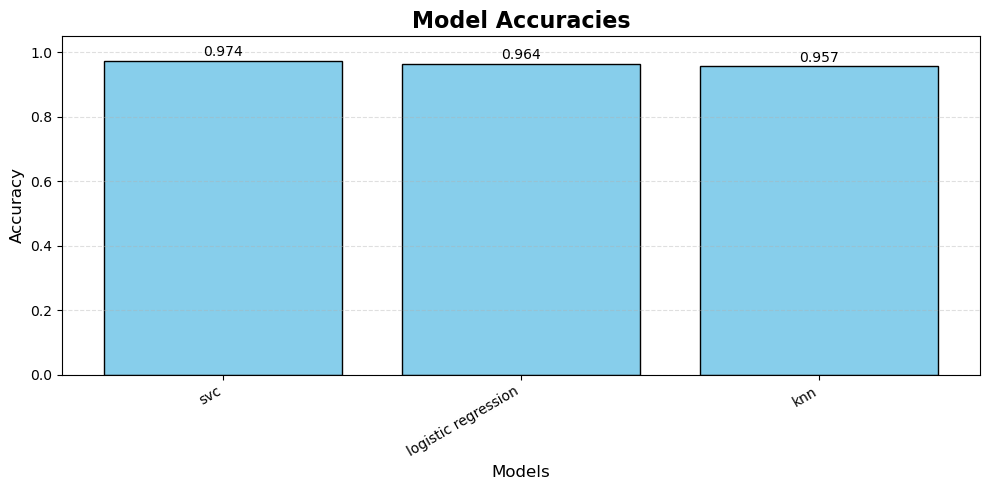

In [25]:
model = list(accuracy.keys())
scores = list(accuracy.values())

plt.figure(figsize=(10, 5))
bars = plt.bar(model, scores, color='skyblue', edgecolor='black')

# Add text labels on top of bars
for bar, score in zip(bars, scores):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.005,
        f"{score:.3f}",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Model Accuracies", fontsize=16, fontweight="bold")
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.ylim(0, 1.05)

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [26]:
import joblib

In [27]:
final_model = models['svc']

In [28]:
joblib.dump( final_model , '../saved_model/svc.pkl' )
joblib.dump( ct , '../saved_model/ct.pkl' )

['../saved_model/ct.pkl']

### Load the models

In [29]:
model = joblib.load( '../saved_model/svc.pkl' )
ct = joblib.load( '../saved_model/ct.pkl' )

In [30]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [31]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1374,81,16,45,26.904357,86.254262,6.727468,59.759800
1245,31,136,197,31.110473,83.340110,5.653776,71.430016
831,3,63,16,24.380419,61.184582,6.868882,53.139467
710,39,73,24,25.658425,61.182358,7.224059,69.286078
15,60,48,39,24.282094,80.300256,7.042299,231.086335
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [32]:
sample = {
    "N": 90,
    "P": 42,
    "K": 43,
    "temperature": 20.879744,
    "humidity": 82.002744,
    "ph": 6.502985,
    "rainfall": 202.935536
}

# Correct way: wrap the dict in a list
sample_df = pd.DataFrame([sample])
print(sample_df)

sample_transformed = ct.transform( sample_df )
print(sample_transformed)

    N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
[[ 1.02594531 -0.33487069 -0.1063551  -0.9455033   0.45364954  0.03756548
   1.79452661]]


In [33]:
model.predict( sample_transformed )[0]

'rice'